In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv("deliveries.csv",squeeze = True)

In [12]:
data = pd.read_csv("matches.csv",squeeze = True)

In [13]:
df["batting_team"]= df["batting_team"].astype("str")

In [38]:
print("welcome to ipl stats")
inp = int(input("""enter your preferenece please
                1) best bowlers
                2) best batsman 
                3) man of the match awards
                4)most 6's
                5)most 4's
                6)avg bowling rate
                7)more than two hundreds team
                8)toss winner vs match win
                9)no of times they become champions
                10)season winners
                11)matches played vc win percentage
                12)run outs
                13)cites
                14)hundreds
                15)fifties
                16)catches
                17)dls applied
                \n"""))

welcome to ipl stats
enter your preferenece please
                1) best bowlers
                2) best batsman 
                3) man of the match awards
                4)most 6's
                5)most 4's
                6)bowling rate
                7)more than two hundreds team
                8)toss winner vs match win
                9)no of times they become champions
                10)season winners
                11)matches played
                12)run outs
                13)cites
                14)hundreds
                15)fifties
                16)catches
                17)dls applied
                
4


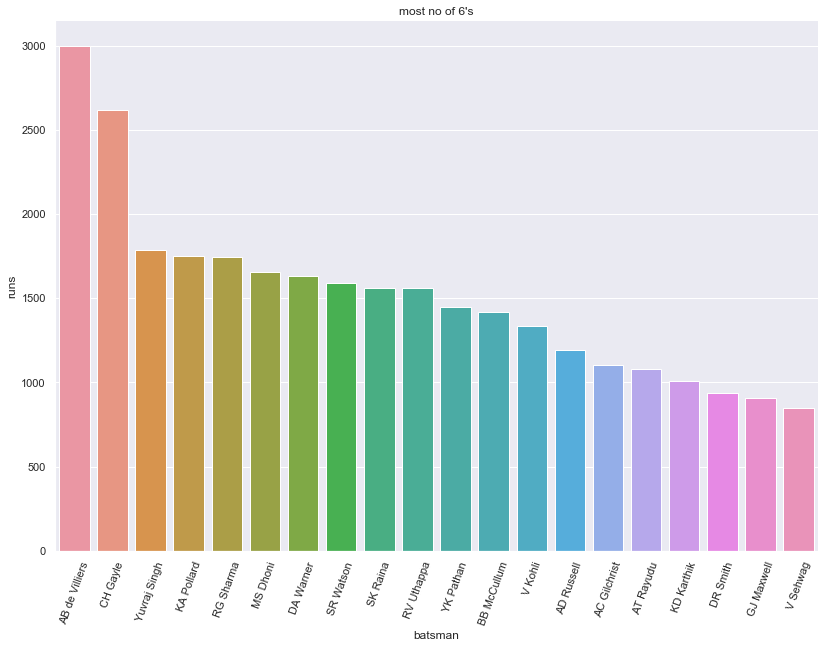

In [39]:
def switch():
    def bb():
                    mask = df[df["dismissal_kind"].notnull()]
                    mask1 = mask["dismissal_kind"] != "run out"
                    k = df["batsman_runs"]==7
                    l = mask[mask1]
                    k = l["bowler"]
                    m = pd.value_counts(k).reset_index().head(20)
                    m.columns = ["bowler","wickets"]
                    sns.catplot(x="bowler",y="wickets",data = m,kind = "bar", aspect=11.7/8.27,size =10)
                    plt.xticks(rotation = 70)
                    plt.show(),
           
    def bm():   
            for i in range(len(df['batsman_runs'])):
                if df["batsman_runs"][i] == 7:
                    print(i)
                    df['batsman_runs'][i] = 6
            k = df["batsman"]
            m = pd.value_counts(k) 
            j = m.head(15).reset_index()
            j.columns = ["batsman","runs"]
            ik = sns.lineplot("batsman","runs",data = j,color = "g")
            plt.title("top 20 batsmans")
            plt.xticks(rotation = 70)
            plt.show(),
           
    def mm(): 
                    df1 = pd.read_csv("matches.csv")
                    o=df1["player_of_match"].value_counts().head(10).reset_index()
                    o.columns = ["batsmans","no of times"]
                    sns.catplot("batsmans","no of times",data = o,height=8.27,kind = "bar", aspect=11.7/8.27)
                    sns.grid = "white"
                    plt.title("man of the match")
                    plt.xticks(rotation = 70)
                    plt.show()
           
    def ms(): 
                    df2 = pd.read_csv("deliveries.csv")
                    lst = list()
                    for i in range(len(df2["batsman_runs"])):
                        if df2["batsman_runs"][i] == 6:

                                p = df2["batsman"][i]
                                for j in range(len(df2["batsman"][i])):
                                            lst.append(p),


                    i=pd.value_counts(lst).head(20).reset_index()
                    i.columns = ["batsman","runs"]
                    sns.catplot("batsman","runs",data = i,kind = "bar", height=8.27, aspect=11.7/8.27)
                    plt.title("most no of 6's")
                    plt.xticks(rotation = 70)
                    plt.show()
    def mf():
                    df2 = pd.read_csv("deliveries.csv")
                    lst = list()
                    for i in range(len(df2["batsman_runs"])):
                        if df2["batsman_runs"][i] == 4:

                                p = df2["batsman"][i]
                                for j in range(len(df2["batsman"][i])):
                                            lst.append(p)


                    h=pd.value_counts(lst).head(10).reset_index()
                    h.columns = ["batsman","runs"]
                    sns.barplot("batsman","runs",data = h)
                    plt.title("most no of 4's")
                    plt.xticks(rotation = 70)
                    plt.show(),
           
    def br():
                    df3 = pd.read_csv("deliveries.csv")
                    k=df3["bowler"].sort_values()
                    no_of_balls=k.value_counts()
                    dit1 = no_of_balls.sort_values()
                    mask9 = df[df["dismissal_kind"].notnull()]
                    mask8 = mask9["dismissal_kind"] != "run out"
                    l = mask9[mask8]
                    k1 = l["bowler"]
                    m = pd.value_counts(k1)
                    dit2 = m.sort_values()
                    k = dit1/dit2
                    k.dropna()
                    j = k.sort_values(ascending = True).head(10).reset_index()
                    j.columns = ["bowler","strikerate"]
                    sns.catplot("bowler","strikerate",data = j,kind = "bar",aspect =8/4,height=4)
                    plt.title("avarage bowler rate")
                    plt.xticks(rotation = 70)
                    plt.show()
                    
    def mt():
        
                    deliveries = pd.read_csv('deliveries.csv')
                    matches = pd.read_csv('matches.csv')
                    high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
                    high_scores=high_scores[high_scores['total_runs']>=200]
                    high_scores.nlargest(11415,'total_runs')
                    k= high_scores["batting_team"].value_counts().reset_index()
                    k.columns=["Team","No of times scored 200 or more"]
                    plt.bar("Team","No of times scored 200 or more",data=k)
                    plt.xticks(rotation=90)
                    
    def twm():    
                matches =pd.read_csv("matches.csv")    
                win_toss_win_match=data[(data['toss_winner'] == data['winner'])]
                df = pd.DataFrame({"Team won the toss":[ win_toss_win_match.shape[0],]}, index = ['Won match'])
                win_season=matches.drop_duplicates(subset=['season'],keep='last')[['season','winner']].reset_index(drop=True)
                win_season=win_season['winner'].value_counts().reset_index()
                win_season.columns=["team","no of times bcame champions"]
                plt.scatter("team","no of times bcame champions",data=win_season)
                plt.xticks(rotation=90)
                    
    def ntc():
                matches =pd.read_csv("matches.csv")
                win_toss_win_match=data[(data['toss_winner'] == data['winner'])]
                df = pd.DataFrame({"Team won the toss":[ win_toss_win_match.shape[0],]}, index = ['Won match'])
                win_season=matches.drop_duplicates(subset=['season'],keep='last')[['season','winner']].reset_index(drop=True)
                win_season=win_season['winner'].value_counts().reset_index()
                win_season.columns=["team","no of times bcame champions"]
                match=pd.read_csv('matches.csv')
                sns.set_style("whitegrid")
                sns.catplot(x="no of times bcame champions",y="team",data=win_season)

    def sw():        
            season_winners=data.groupby('season')['season','winner'].tail(1)
            season_winners=season_winners.sort_values('season',ascending = True)
            plt.bar("season","winner",data=season_winners)              
                    
    def mp():
            matches_played=pd.concat([data["team1"],data["team2"]])
            matches_played=matches_played.value_counts().reset_index()
            matches_played.columns=["teams","total mactches"]
            matches_played["wins"]=data["winner"].value_counts().reset_index()["winner"]
            percentage=matches_played["wins"]/matches_played["total mactches"]
            matches_played["percentage"]=percentage
            sns.set(style="white")
            sns.lineplot(x="teams",y="percentage",data=matches_played,color="r");
            plt.xticks(rotation=90)
            plt.title("win percentage(%)")
    def ro():
         
            run_outs1=df[df["dismissal_kind"].notnull()]
            run_outs=run_outs1["dismissal_kind"]=="run out"
            ro=run_outs1[run_outs]
            out=ro["fielder"]
            out=pd.value_counts(out).reset_index()
            out.columns=["fielder","no of times made run outs"]
            sns.set(style="white")
            sns.catplot(x="fielder",y="no of times made run outs",data=out.head(20),kind="bar",aspect=2);
            plt.xticks(rotation=90)
            plt.title("run outs count")
                  
                    
    def ct():
        see=data["city"].value_counts().reset_index()
        see = data['city'].apply(lambda x: str(x))
        see = data['city'].apply(lambda x: "Bengaluru" if x =="Bangalore" else x)
        see=see.value_counts().reset_index()
        see.columns=["city","no of time played"]
        sns.set(style="white")
        sns.catplot(x="city",y="no of time played",data=see,kind="swarm",size =8);
        plt.xticks(rotation=90)
        plt.title("no of matches played in each city")
                    
    def hd():
        data=pd.read_csv('deliveries.csv')
        player=data[(data.batsman_runs!=0)&(data.batsman)]
        runsinmatch = data.groupby(["batsman","match_id"]).agg({'batsman_runs':'sum'}).reset_index()
        runsinmatch.sort_values(by="batsman_runs",ascending=False)
        hundred=runsinmatch[runsinmatch["batsman_runs"]>=100]
        hundred=hundred["batsman"].value_counts().reset_index()
        hundred.columns=["batsman","centuries"]
        hundred.head(2)
        sns.set_style("whitegrid")
        sns.catplot(x="centuries",y="batsman",data=hundred.head(20))
        
    def ft():
        data=pd.read_csv('deliveries.csv')
        runsinmatch = data.groupby(["batsman","match_id"]).agg({'batsman_runs':'sum'}).reset_index()
        runsinmatch.sort_values(by="batsman_runs",ascending=False)
        fifty=runsinmatch[(runsinmatch["batsman_runs"]<100)&(runsinmatch["batsman_runs"]>=50)]
        fifty=fifty["batsman"].value_counts().reset_index()
        fifty.columns=["batsman","fifties"]
        sns.set_style("darkgrid")
        sns.catplot(x="fifties",y="batsman",data=fifty.head(15))
                    
    def cts():
        data=pd.read_csv('deliveries.csv')
        player=data[(data.fielder.notnull())&(data.dismissal_kind=='caught')]
        caught=player["fielder"].value_counts().reset_index()
        caught.columns=["fielder","no of catches"]
        plt.xlabel('fielder')
        plt.ylabel('no of catches')
        plt.xlim(40,120)
        plt.ylim(20)
        plt.scatter(x='no of catches',y='fielder',color='b',data=caught)
        plt.show()
                    
    def dls():
        df=pd.read_csv("matches.csv")
        new=df.loc[ df['dl_applied']!=0,['dl_applied','winner']]
        dls=new["winner"].value_counts().reset_index()
        dls.columns=["team","count"]
        sns.set_style("darkgrid")
        sns.barplot(x="count",y="team",data=dls)
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    

    def default():
           print("enter valid no")
                    
    dict = {
        
        1:bb,
        2:bm,
        3:mm,
        4:ms,
        5:mf,
        6:br,
        7:mt,
        8:twm,
        9:ntc,
        10:sw,
        11:mp,
        12:ro,
        13:ct,
        14:hd,
        15:ft,
        16:cts,
        17:dls,
       
        
    }
    
    dict.get(inp,default)()
switch()    